<a href="https://colab.research.google.com/github/veeraprathp/100-days-of-Machine-Learning/blob/main/Kernel_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

importing the dataset


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


**Loading the dataset**

In [23]:
dataset = pd.read_csv('/content/Wine.csv')
x= dataset.iloc[:,:-1].values
y=dataset.iloc[:,-1].values

**splitting the dataset into the Training set and Test set**

In [30]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test =train_test_split(x,y,test_size = 0.2, random_state =0)

Feature Scaling

In [31]:
from sklearn.preprocessing import StandardScaler
sc  =StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Applying kernel PCA

In [38]:
from sklearn.decomposition import KernelPCA
kpca =  KernelPCA(n_components=2,kernel= 'rbf')
X_train = kpca.fit_transform(X_train)
X_test = kpca.transform(X_test)

Traing the Logistic Regression model in the Traing set

In [39]:
from sklearn.linear_model import LogisticRegression
Classifier =LogisticRegression(random_state = 0 )
Classifier.fit(X_train,Y_train)

LogisticRegression(random_state=0)

Making the Confusion matrix

In [40]:
from sklearn.metrics import confusion_matrix,accuracy_score
Y_pred = Classifier.predict(X_test)
cm = confusion_matrix(Y_test,Y_pred)
print(cm)
accuracy_score(Y_test,Y_pred)

[[14  0  0]
 [ 0 16  0]
 [ 0  0  6]]


1.0

Visulaising the Training set Results

<ipython-input-42-f6f0bf980780>:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


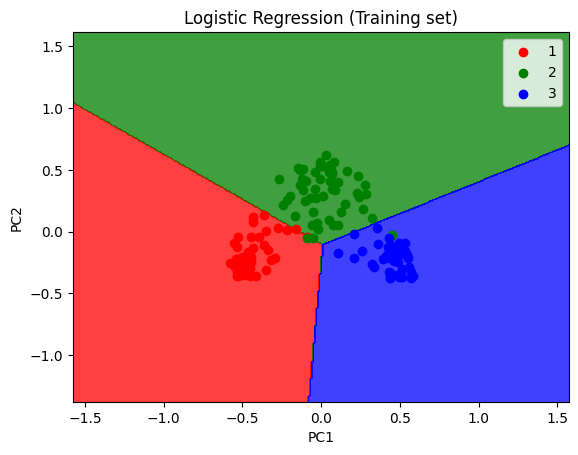

In [42]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, Y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, Classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()


Visulaizinf the Test Set

<ipython-input-43-4fcd8761bb04>:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


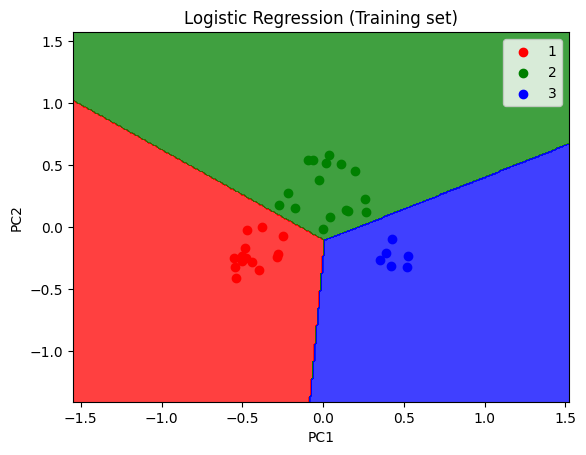

In [43]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, Y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, Classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()
